In [1]:
# disable warnings up front for a cleaner experience
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
 

# League of Legends

*League of Legends* or *LoL* is a MOBA developed by Riot Games, captivating players with its strategic gameplay and vibrant esports scene. Originating as a standalone title, it has grown to become one of the most prominent games globally. The pinnacle of competitive play in League of Legends is the *World Championship* (Worlds) an annual tournament that draws attention from millions of fans. The prize pool fluctuates, with the champions taking home substantial amounts (e.g., $2.34 million in 2022, $2.34 million in 2021, $2.34 million in 2019, etc.). Teams vie for a spot in Worlds through regional leagues and qualifiers.

League of Legends is renowned for its depth and demanding learning curve. The game has a roster of over 150 champions, each equipped with a unique set of abilities. Teams are composed of five champions each, and with a multitude of items and strategic choices, the potential combinations are staggering. The complexity amplifies when considering lane assignments, itemization strategies, and other tactical nuances. Mastering League of Legends requires an extensive understanding of the game's intricacies, in addition to the mechanical skills required to control a champion, collaborate with teammates, and adapt to opponents' strategies.

Attempting to quantify the game's complexity and meta is a formidable task, yet we can gain insights by analyzing extensive match data from the World Championship throughout the years.
The website [Game of League Esports](https://gol.gg/esports/home/) has an immense amount of data regarding almost all professional LoL Tournaments. While most of the data is free, the website does have premium options for more data such as betting, and analytical information. 

I am going to use the match data from the World Championship Series and focusing on the World Championship 2023 Series that just concluded in November:

* [World Championship 2015](https://gol.gg/champion/list/season-S5/split-ALL/tournament-World%20Championship%202015/) (2015-10-01 - 2015-10-31)
* [World Championship 2016](https://gol.gg/champion/list/season-S6/split-ALL/tournament-World%20Championship%202016/) (2016-09-29 - 2016-10-29)
* [World Championship 2017](https://gol.gg/champion/list/season-S7/split-ALL/tournament-World%20Championship%202017/) (2017-09-23 - 2017-11-04)
* [World Championship 2018](https://gol.gg/champion/list/season-S8/split-ALL/tournament-World%20Championship%202018/) (2018-10-01 - 2018-11-03)
* [World Championship 2019](https://gol.gg/champion/list/season-S9/split-ALL/tournament-World%20Championship%202019/) (2019-10-02 - 2019-11-10)
* [World Championship 2020](https://gol.gg/champion/list/season-S10/split-ALL/tournament-World%20Championship%202020/) (2020-09-25 - 2020-10-31)
* [World Championship 2021](https://gol.gg/champion/list/season-S11/split-ALL/tournament-World%20Championship%202021/) (2021-10-05 - 2021-11-06)
* [World Championship 2022](https://gol.gg/champion/list/season-S12/split-ALL/tournament-World%20Championship%202022/) (2022-09-29 - 2022-11-05)
* [Worlds Main Event 2023](https://gol.gg/champion/list/season-S13/split-ALL/tournament-Worlds%20Main%20Event%202023/) (2023-10-10 - 2023-11-19)

We also have a file that shows data regarding the Top Laners in the Worlds Main Event 2023 that will be used to observe the differences in the professional players for this tournament.
* [Worlds Main Event 2023 Top Lane](https://gol.gg/players/list/season-S13/split-ALL/tournament-Worlds%20Main%20Event%202023/)

There is one more file that shows all matches played in the Worlds Main Event 2023, specifically the teams that played, the winning team, and the champions picked by each team.
* [2023 Season World Champion/Main Event](https://lol.fandom.com/Special:RunQuery/MatchHistoryGame?MHG%5Bpreload%5D=Tournament&MHG%5Btextonly%5D=Yes&MHG%5Bspl%5D=yes&MHG%5Btournament%5D=2023%20Season%20World%20Championship/Main%20Event&_run=)

Code is provided under the `lol` directory so as to keep this notebook slimmer.

## The Data

We will load all of the tournament data and concatenate them into a single, monolithic dataframe. We will also load the hero data used to augment the match data.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
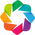

In [2]:
import lol 
champs = lol.get_champ_data()
top_lane = lol.get_top_data()
champs_picked = lol.get_picks_data()

In [3]:
champs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Champion  1485 non-null   object 
 1   Picks     1485 non-null   int64  
 2   Bans      1485 non-null   int64  
 3   Presence  1485 non-null   object 
 4   Wins      696 non-null    float64
 5   Losses    696 non-null    float64
 6   Winrate   696 non-null    object 
 7   KDA       696 non-null    object 
 8   Avg BT    1485 non-null   object 
 9   GT        696 non-null    object 
 10  CSM       696 non-null    float64
 11  DPM       696 non-null    float64
 12  GPM       696 non-null    float64
 13  CSD@15    696 non-null    float64
 14  GD@15     696 non-null    float64
 15  XPD@15    696 non-null    float64
 16  Year      1485 non-null   int64  
dtypes: float64(8), int64(3), object(6)
memory usage: 197.4+ KB


In [4]:
champs.sample()

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,GT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15,Year
1318,Naafiri Naafiri,0,0,0%,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [5]:
top_lane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       16 non-null     object 
 1   Country      16 non-null     object 
 2   Position     16 non-null     object 
 3   Games        16 non-null     int64  
 4   Win rate     16 non-null     object 
 5   KDA          16 non-null     float64
 6   Avg kills    16 non-null     float64
 7   Avg deaths   16 non-null     float64
 8   Avg assists  16 non-null     float64
 9   CSM          16 non-null     float64
 10  GPM          16 non-null     int64  
 11  KP%          16 non-null     object 
 12  DMG%         16 non-null     float64
 13  DPM          16 non-null     int64  
 14  VSPM         16 non-null     float64
 15  Avg WPM      16 non-null     float64
 16  Avg WCPM     16 non-null     float64
 17  Avg VWPM     16 non-null     float64
 18  GD@15        16 non-null     int64  
 19  CSD@15    

In [6]:
top_lane.sample()

,Player,Country,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,...,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim,Penta Kills,Solo Kills,Year
2,Bin,CN,TOP,18,50%,2.6,3.1,2.6,3.5,8.0,...,0.12,0.18,-197,-1,-270,16.70%,5.60%,0,6,2023


In [7]:
champs_picked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   match_id    244 non-null    int64 
 1   Winner      244 non-null    object
 2   Blue Picks  244 non-null    object
 3   Red Picks   244 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.8+ KB


In [8]:
champs_picked.sample()

,match_id,Winner,Blue Picks,Red Picks
33,34,Red,"Renekton,Jarvan IV,Ahri,Aphelios,Alistar","Gnar,Viego,Neeko,Zeri,Nautilus"


I will first start with the `champs` data. The Data Frame contains a significant amount of data; however, I am going to focus on the `picks` column and `bans` column as well as the `winrate` column. 

## The Draft Phase (Picks & Bans)

I will start by looking at the presense of the champions. In a professional match of League of Legends, the teams take turns banning and choosing champions. This part of the match is called the *draft phase*. When a champion is banned, neither team is allowed to select this champion. This is the same for when a team selects a champion too (there are no duplicate champions allowed). I am looking to see which champions are deemed to be more vaulable compared to others. Thus, I will be looking at the Presence column. This column shows the percentage that the champion was present in all of the drafts.

In the `Picks` and `Bans` columns, it shows the number of times a champion was picked or banned during the draft phase. We can also observe this data to see how much priority a champion had during the World Championships and how this changed throughout the years.

To begin I will filter the data and sort it by only looking at the `Presense`, `Picks`, `Bans`, and `Year` columns.

In [9]:
import pandas as pd

# pulling the columns that I need for my plot
presence_data = champs.loc[:,('Champion', 'Picks', 'Bans', 'Presence', 'Year')]


Now that I have the data I need, I am creating a slider so anyone can sort the data as they please.

In [10]:
import panel as pn 

# changing 'Presence' column to an integer type and removing the '%' symbol
presence_data['Presence'] = presence_data['Presence'].str.replace('%', ' ').astype(int)

# creating the tabulator for the presence_data
presence_data_tb = pn.widgets.Tabulator(
    presence_data,
    page_size=15,
    pagination='local',
    selectable=False,
    disabled=False
)
# provide a slider to filter out heroes with low presence counts
pick_slider = pn.widgets.IntSlider(
    name='Minimum Presence',
    start=0,
    end=int(presence_data.Presence.max()),
    step=1
)

@pn.depends(pick_slider, watch=True)
def filtered_champ_picks(value):
    presence_data_tb._filters = []
    presence_data_tb.add_filter((value, pick_slider.end), 'Presence')

pn.Column(pick_slider, presence_data_tb)


Column
    [0] IntSlider(end=100, name='Minimum Presence')
    [1] Tabulator(page_size=15, pagination='local', selectable=False, value=              ...)

If you sort the Dataframe by highest to lowest Presence you can see that most of the champions who have a high presence have more bans than picks. The reason for their high presence in the World Championship is due to teams being afraid to play against these champions so they ban it instead of trying to counter pick it. 

Looking at the 5 champions with 100% presence, we can see that two of them, Kalista and Pantheon, have a 100% ban rate. This means that these champions were banned every single game at the World Championship. They were never picked, and never not banned. 

In [11]:
import pandas as pd
import holoviews as hv
import hvplot.pandas
import panel as pn

def scatter_plot(champion):
    selected_data = presence_data[presence_data['Champion'] == champion].copy()

# scale the size of Presence by an addition 1000 due to the small sizing of the data points with regular Presense size.
    selected_data['Scaled_Presence'] = selected_data['Presence'] + 1000

    plot = selected_data.hvplot.scatter(
        x='Picks',
        y='Bans',
        s='Scaled_Presence',
        c='Year',
        cmap='viridis',
        clabel='By Year',
        hover_cols=['Champion']
    ).opts(
        xlim=(-5,60),
        ylim=(-5,80),
        clim=(2015, 2023),
        title=f'Presence of {champion} in World Championship',
        xlabel='Picks',
        ylabel='Bans',
        height=450,
        width=800,
    )
    return plot

champion_names = sorted(presence_data['Champion'].unique())

champion_selector = pn.widgets.Select(options=champion_names, name='Select Champion')

@pn.depends(champion=champion_selector.param.value)
def update_plot(champion):
    return scatter_plot(champion)

graph = pn.Row(
    pn.Column(champion_selector),
    pn.Column(update_plot)
)

graph


Row
    [0] Column
        [0] Select(options=['Aatrox Aatrox', ...], value='Aatrox Aatrox')
    [1] Column
        [0] ParamFunction(function, _pane=HoloViews, defer_load=False)

When using the above Champion Selector, you can see the `Picks` and `Bans` for each champion. They are color coded by the `Year` of the World Championship. For some champions, there are multiple circles overlapping due to them having the same 0 `Picks` and `Bans`, thus meaning 0 `Presence`. We do notice that the further a champ is to the top or right of the graph, the higher the Presence is for that champion. When hovering over the points, you can see the specific data of that champion. I had to scale the Presence by an additional 1000 (`Scaled_Presence`) due to the data points being too small when it's scaled by the Presence Column.

## Best Top Laner of World Championship 2023 

In League of Legends, there are three lanes: Top, Middle, and Bottom. In this years World Championship, there was a lot of press and talk about the Top Lane players. Specifically, a Korean Top Laner by the name of Zeus. Everyone was discussing how he was dominating every player he came across throughout the tournament. His team ended up winning the World Championship and he was given the Player MVP Trophy.

So, I will be looking at all of the Top Laners in the 2023 World Championship Tournament and comparing their statistics to Zeus' to see if he was dominating like the press and media said. 

In [12]:
# removing the percentage symbol from winrate and changing it to a numeric string type
top_lane['Win rate'] = pd.to_numeric(top_lane['Win rate'].str.replace('%', ''))

# creating the tabulator for the top_lane data
top_lane_tb = pn.widgets.Tabulator(
    top_lane,
    pagination='local',
    selectable=False,
    disabled=False
)
# provide a slider to filter out low KDA
top_slider = pn.widgets.FloatSlider(
    name='Kill Death Assist',
    start=0,
    end=float(top_lane.KDA.max()),
    step=0.1
)

@pn.depends(top_slider, watch=True)
def filtered_top_picks(value):
    top_lane_tb._filters = []
    top_lane_tb.add_filter((value, top_slider.end), 'KDA')

pn.Column(top_slider, top_lane_tb)


Column
    [0] FloatSlider(end=5.0, name='Kill Death Assist')
    [1] Tabulator(pagination='local', selectable=False, value=         Player C...)

The above data frame has a slider where you can sort by Kill Death Assist (KDA). KDA means the ratio of the sum of kills and assists, over deaths. Obviously, a player would want higher kills/assists than deaths in any game. We can see that most of the players have a KDA in the range 2-3 give or take. However, when looking at Zeus' KDA at a score of 5.0, this is an example of how dominate he really was. This means that for every 5 kills he got, he only died 1 time. Comparing this to the other players, who have around a 2-3 KDA, this means thats they only got 2-3 kills per 1 death. Zeus' KDA is doubled compared to some of the other players.

I will now make a plot comparing the Gold per Minute (GPM) and Creep Score per Minute (CSM). 

In [13]:
# making scatter plot of top laners
top_data = top_lane.hvplot.scatter(
        x='GPM',
        y='CSM',
        s=1000,
        c='Win rate',
        cmap='plasma',
        clabel='Win Rate',
        hover_cols=['Player']
    ).opts(
        xlim=(350,460),
        ylim=(7,9.5),
        clim=(0.00, 100.00),
        title=f'GPM and CSM effect on Win Rate',
        xlabel='Gold Per Minute',
        ylabel='Creep Score Per Minute',
        height=480,
        width=900,
    )

top_data

:Scatter   [GPM]   (CSM,Win rate,Player)

From this graph, we can clearly see that Zeus did indeed dominate his competitors. All of the other players are all grouped near each other whereas Zeus is all the way in the top right of the graph. This is mainly due to his amount of Gold per Minute which is an additional 49 gold above the next closest player. Also, looking at the win rate of the players, they all are a purple/pink hue whereas Zeus is a yellow color. This is due to his win rate being significantly higher compared to the other players. 

Even when looking at other statistics in the data frame above, we can see that Zeus is in the top 3 of all the good statistics such as DPM (Damage per Minute), GD@15 (Average Gold Differential at 15 minutes), CSD@15 (Average CS Score at 15 minutes), and Solo Kills. All of these statistics are focused on the individual and not the team. The teammates have a minor effect on this data compared to the player, who is the primary factor influencing it.

In [22]:
# sorting the data into their perspective lane
champs_picked[['BTop', 'BJgl', 'BMid', 'BAdc', 'BSup']] = champs_picked['Blue Picks'].str.split(',', expand=True)
champs_picked[['RTop', 'RJgl', 'RMid', 'RAdc', 'RSup']] = champs_picked['Red Picks'].str.split(',', expand=True)

#dropping the unnecessary columns
picks_and_winner = champs_picked.drop(['Blue Picks', 'Red Picks'], axis=1)
champ_names = champs_picked.drop(['Blue Picks', 'Red Picks', 'match_id'], axis=1)

# Get unique champion names
all_champions = sorted(set(champ_names.values.flatten()))

picks_and_winner

,match_id,Winner,BTop,BJgl,BMid,BAdc,BSup,RTop,RJgl,RMid,RAdc,RSup
0,1,Red,Kennen,Bel'Veth,Azir,Varus,Bard,Aatrox,Lee Sin,Akali,Xayah,Rakan
1,2,Red,Aatrox,Maokai,Ahri,Kalista,Senna,Gwen,Nocturne,Sylas,Draven,Renata Glasc
2,3,Red,Aatrox,Maokai,Jayce,Senna,Tahm Kench,Yone,Lee Sin,Ahri,Kalista,Renata Glasc
3,4,Red,Aatrox,Bel'Veth,Orianna,Zeri,Lulu,Yone,Jarvan IV,Azir,Varus,Bard
4,5,Blue,Aatrox,Rell,Azir,Kalista,Renata Glasc,Renekton,Wukong,Taliyah,Varus,Ashe
...,...,...,...,...,...,...,...,...,...,...,...,...
239,240,Red,Ornn,Maokai,Tristana,Xayah,Braum,Aatrox,Sejuani,Sylas,Aphelios,Rakan
240,241,Blue,Rumble,Sejuani,Tristana,Varus,Sett,Jax,Poppy,Yone,Xayah,Rakan
241,242,Red,Ornn,Rell,Kai'Sa,Jinx,Thresh,Fiora,Sejuani,Ahri,Xayah,Rakan
242,243,Red,Rumble,Rell,Lissandra,Jinx,Thresh,Jax,Sejuani,Ahri,Xayah,Rakan


In [73]:
def get_all_champion_wins_losses(row):
    winner = slice(0, 5) if row['Winner'] == 'Blue' else slice(5, 10)
    match = pd.DataFrame({'id': row.name, 'win': False, 'name': row.iloc[1:]})
    match.iloc[winner, 1] = True
    return match.reset_index(drop=True)

champion_matchup_data = pd.concat(champ_names.apply(get_all_champion_wins_losses, axis=1).tolist()).reset_index(drop=True)
champion_matchup_data

,id,win,name
0,0,False,Kennen
1,0,False,Bel'Veth
2,0,False,Azir
3,0,False,Varus
4,0,False,Bard
...,...,...,...
2435,243,True,Ornn
2436,243,True,Rell
2437,243,True,Lucian
2438,243,True,Xayah


In [75]:
# get all game IDs where Kennen was present
all_games_with_kennen = champion_matchup_data[champion_matchup_data['name'] == 'Kennen'].id

# create a mask separately, just to take explicit steps
kennen_match_id_mask = champion_matchup_data['id'].isin(all_games_with_kennen)

# apply the mask to champion_matchup_data to get all matches where Kennen was present 
kennen_matches = champion_matchup_data[kennen_match_id_mask]

# filter, using two masks, the kennen_matches dataframe to pull the matches where Kennen won
kennen_match_wins = kennen_matches[(kennen_matches['name'] == 'Kennen') & (kennen_matches['win'])]

# filter, using two masks, the kennen_matches dataframe to pull the matches where Kennen lost
kennen_match_losses = kennen_matches[(kennen_matches['name'] == 'Kennen') & (~kennen_matches['win'])]

# apply masks to pull the rest of the heroes from the wins and losses
kennen_wins_against = kennen_matches[kennen_matches['id'].isin(kennen_match_wins['id']) & ~kennen_matches['win']]
kennen_loses_against = kennen_matches[kennen_matches['id'].isin(kennen_match_losses['id']) & kennen_matches['win']]

kennen_wins_against

,id,win,name
545,54,False,Sion
546,54,False,Sejuani
547,54,False,Azir
548,54,False,Zeri
549,54,False,Rakan
700,70,False,Malphite
701,70,False,Kha'Zix
702,70,False,Neeko
703,70,False,Sivir
704,70,False,Alistar


,id,win,name


In [150]:
# define function to get matchup data
def get_champion_matchup_data(champion):

    if champion in champion_matchup_data['name'].unique():
        all_games_with_champion = champion_matchup_data[champion_matchup_data['name'] == champion].id

        champion_match_id_mask = champion_matchup_data['id'].isin(all_games_with_champion)
        champion_matches = champion_matchup_data[champion_match_id_mask]
        
        champion_match_wins = champion_matches[(champion_matches['name'] == champion) & (champion_matches['win'])]
        champion_match_losses = champion_matches[(champion_matches['name'] == champion) & (~champion_matches['win'])]

        champion_wins_against = champion_matches[champion_matches['id'].isin(champion_match_wins['id']) & ~champion_matches['win']]
        champion_loses_against = champion_matches[champion_matches['id'].isin(champion_match_losses['id']) & champion_matches['win']]

        return champion_wins_against, champion_loses_against
    else:
        return pd.DataFrame(), pd.DataFrame()

champion_selector = pn.widgets.Select(name='Champion', options=all_champions)
champion_matchup_data_tb = pn.widgets.Tabulator(show_index=False)


@pn.depends(champion_selector, watch=True)
def select_champion_matchups(champion):
    wins, losses = get_champion_matchup_data(champion)

    wins_counts = wins['name'].value_counts()
    losses_counts = losses['name'].value_counts()

    wins_data = pd.DataFrame({'Champion': wins_counts.index, 'Wins': wins_counts})
    losses_data = pd.DataFrame({'Champion': losses_counts.index, 'Losses': losses_counts})

    # Combine wins and losses counts into a single DataFrame
    combined_data = pd.merge(wins_data, losses_data, on='Champion', how='outer').fillna(0)
    combined_data['Total'] = combined_data['Wins'] + combined_data['Losses']
    combined_data['win_rt'] = (combined_data['Wins'] / combined_data['Total'] * 100).mask(combined_data['Total'] == 0, 0)
    champion_matchup_data_tb.value = combined_data


@pn.depends(champion_selector, champion_matchup_data_tb)
def plot_scatter(champion, get_champion_matchup_data) -> hv.Scatter:
    champion_data = champion_matchup_data[champion_matchup_data['Champion'] != champion]
    champion_plot = champion_data[champion_data].hvplot.scatter(
        x='Losses',
        y='Wins',
        c='win_rt',
        cmap='plasma',
        clabel='Win Percentage',
    ).opts(
        clim=(0,100),
        size=hv.dim('win_rt')/5,
        title=f'{champion} Wins & Losses',
        xlabel=f'Wins against {champion}',
        ylabel=f'Losses to {champion}',
        height=480,
        width=720,
        default_tools=['box_zoom', 'reset']
    )
 # display selector + table + scatterplot
pn.Row(
    pn.Column(
        champion_selector,
        champion_matchup_data_tb
    ),
    hv.DynamicMap(plot_scatter)
)

Invoked as plot_scatter(value=None)


TypeError: plot_scatter() got an unexpected keyword argument 'value'

Row
    [0] Column
        [0] Select(name='Champion', options=['Aatrox', 'Ahri', ...], value='Aatrox')
        [1] Tabulator(show_index=False)
    [1] HoloViews(DynamicMap)

In [72]:
#Function that gives us all games a champion is in
def get_games_for_champion(picks_and_winner: pd.DataFrame, champion: str) -> pd.DataFrame:
    # Create a mask to filter rows where the specified champion is picked in any position
    mask = (picks_and_winner == champion).any(axis=1)
    
    # Filter the DataFrame based on the mask
    champion_games = picks_and_winner[mask]
    
    return champion_games

champion_select = pn.widgets.Select(name='Champion', options=all_champions)
match_data = pn.widgets.Tabulator(show_index=False, width=800)

@pn.depends(champion_select, watch=True)
def get_games(champ):
    match_data.value = get_games_for_champion(picks_and_winner, champ)

pn.Column(champion_select, match_data)

Column
    [0] Select(name='Champion', options=['Aatrox', 'Ahri', ...], value='Aatrox')
    [1] Tabulator(show_index=False, width=800)

In [152]:
def count_games_with_champions(champ_names, champ1, champ2):
    
    # Initialize a counter for the number of games
    games_count = 0
    
    # Iterate through each row
    for index, row in champ_names.iterrows():
        # Check if both champions are in the same row
        if champ1 in row.values and champ2 in row.values:
            games_count += 1
    
    return games_count

total_games_shared = count_games_with_champions(champ_names, "K'Sante", 'Aatrox')

total_games_shared

8

In [157]:
def find_games_with_champions(picks_and_winner, champion1, champion2):
 
    rows_with_champions = []
    
    for index, row in picks_and_winner.iterrows():    
        if champion1 in row.values and champion2 in row.values:
            rows_with_champions.append(row)
            
    df_rows_with_champions = pd.DataFrame(rows_with_champions)
    
    return df_rows_with_champions

In [52]:
champ_selector_1 = pn.widgets.Select(name='Champion 1', options=all_champions)
champ_selector_2 = pn.widgets.Select(name='Champion 2', options=all_champions)
match_data = pn.widgets.Tabulator(show_index=False)

@pn.depends(champ_selector_1, champ_selector_2, watch=True)
def get_matches_with_champion_dynamic(champion1, champion2):
    match_data.value = find_games_with_champions(picks_and_winner, champion1, champion2)

pn.Column(champ_selector_1, champ_selector_2, match_data)

Column
    [0] Select(name='Champion 1', options=['Aatrox', 'Ahri', ...], value='Aatrox')
    [1] Select(name='Champion 2', options=['Aatrox', 'Ahri', ...], value='Aatrox')
    [2] Tabulator(show_index=False)

In [154]:
def count_games_champion_won(champ_names, champion):
    # Initialize a counter for the number of games won by the champion
    games_won_count = 0
    

    for index, row in champ_names.iterrows():
        winner = row['Winner']
        if winner == 'Blue':
            if any(champion == row[column] for column in champ_names.columns if column.startswith('B')):
                games_won_count += 1
        elif winner == 'Red':
            if any(champion == row[column] for column in champ_names.columns if column.startswith('R')):
                games_won_count += 1
                
    return games_won_count

games_won_count = count_games_champion_won(champ_names, "Caitlyn")

champ_selector_1 = pn.widgets.Select(name='Champion 1', options=all_champions)

# Create output widget to display the number of games won
match_data = pn.widgets.StaticText(name='Matches Won')

# Function to update the output based on the selected champion
@pn.depends(champ_selector_1.param.value, watch=True)
def get_matches_won_dynamic(champion):
    games_won_count = count_games_champion_won(champ_names, champion)
    match_data.value = f"{champion} has won {games_won_count} games."

# Create Panel layout
pn.Column(champ_selector_1, match_data)

Column
    [0] Select(name='Champion 1', options=['Aatrox', 'Ahri', ...], value='Aatrox')
    [1] StaticText(name='Matches Won')

In [69]:
# Function to count the number of wins for a champion against all other champions
def count_wins_losses(champ_names, champion):
  
    relevant_columns = [col for col in champ_names.columns if col.startswith('B') or col.startswith('R')]
    
    # Extract opponent names
    opponents = champ_names[relevant_columns].values.flatten()
    
    # Remove champion's name from opponent list
    opponents = opponents[opponents != champion]
    
    # Count wins and losses for each opponent
    wins = champ_names.eq(champion).sum(axis=0) @ champ_names.eq(opponents).T
    losses = champ_names.eq(opponents).sum(axis=0) @ champ_names.eq(champion).T
    # Create DataFrame with wins and losses
    data = {
        'Champion': opponents,
        'Wins': wins,
        'Losses': losses
    }
    return pd.DataFrame(data)

In [156]:
def count_wins_against_opponent(champ_names, champion1, champion2):
    """
    Count the number of wins for champion1 against champion2.
    
    Parameters:
        champ_names (pandas.DataFrame): DataFrame containing champion and winner information.
        champion1 (str): Name of the first champion.
        champion2 (str): Name of the second champion.
    
    Returns:
        int: Total number of wins for champion1 against champion2.
    """
    # Initialize a counter for the number of wins
    wins_count = 0
    
    # Iterate through each row
    for index, row in champ_names.iterrows():
        # Get the winner of the game
        winner = row['Winner']
        # Check if both champions are present in the row
        if champion1 in row.values and champion2 in row.values:
            # Check if champion1 won the game
            if (winner == 'Blue' and any(champion1 == row[column] for column in row.index if column.startswith('B'))) \
                or (winner == 'Red' and any(champion1 == row[column] for column in row.index if column.startswith('R'))):
                wins_count += 1
    
    return wins_count

In [66]:
# Create select widgets for choosing the champions
champ_selector_1 = pn.widgets.Select(name='Select Champion 1', options=all_champions)
champ_selector_2 = pn.widgets.Select(name='Select Champion 2', options=all_champions)

# Create output widget to display the number of wins
wins_data = pn.widgets.StaticText(name='Wins Count')

# Function to update the output based on the selected champions
@pn.depends(champ_selector_1.param.value, champ_selector_2.param.value, watch=True)
def get_wins_count_dynamic(champion1, champion2):
    wins_count = count_wins_against_opponent(champ_names, champion1, champion2)
    wins_data.value = f"{champion1} has won {wins_count} games against {champion2}."

# Create Panel layout
pn.Column(champ_selector_1, champ_selector_2, wins_data)

Column
    [0] Select(options=['Aatrox', 'Ahri', ...], value='Aatrox')
    [1] Select(options=['Aatrox', 'Ahri', ...], value='Aatrox')
    [2] StaticText(name='Wins Count')

## Conclusion

In this notebook, we have looked at the statistics of champion data through the League of Legends World Championships from 2015-2023. Despite this being the most important tournament in the world, there are many other smaller and regional tournaments that were not looked at. The champion data over the past 9 years has provided us with some insight on which characters are more important in the World Championship meta, as well as which champions are neglected and never played. 

We also took a look at the Top Lane Players in the 2023 World Championship tournament, where we saw that 1 player (Zeus) stood out compared to the rest. Because of his amazing performances and large player gap, it is clear to anyone that he deserved to win the 2023 MVP Trophy. This process can be similarly done to all lanes and players throughout all of the World Championships.